In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import koreanize_matplotlib

In [5]:
os.chdir('/content/drive/MyDrive/0808_새싹_로그분석프로젝트/raw_file')

In [6]:
os.getcwd()

'/content/drive/MyDrive/0808_새싹_로그분석프로젝트/raw_file'

In [7]:
os.chdir('/content/drive/MyDrive/0808_새싹_로그분석프로젝트/raw_file')

ab_assignment = pd.read_csv('ab_assignment.csv')
campaigns = pd.read_csv('campaigns.csv')
chat_events = pd.read_csv('chat_events.csv')
event_logs = pd.read_csv('event_logs.csv')
payment_transactions = pd.read_csv('payment_transactions.csv')
plan_history = pd.read_csv('plan_history.csv')
push_events = pd.read_csv('push_events.csv')
referral_events = pd.read_csv('referral_events.csv')
users = pd.read_csv('users.csv')

In [8]:
ab_assignment['experiment_name'].unique()
ab_assignment['variant'].unique()

array(['A', 'B', 'test', 'original', 'redesign', 'control'], dtype=object)

In [9]:
campaigns.head()

,campaign_id,name,utm_source,utm_campaign
0,cmp_001,Spring Promo,facebook,spring24
1,cmp_002,Referral,referral,ref_buddy
2,cmp_003,Google CPC,google,sem24


In [10]:
chat_events['tag'].value_counts()

,count
tag,
Complaint,293
Account,293
Other,277
Payment,275
Feature Suggestion,261
Error,248
Learning,241
Praise,237


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
chat_events.loc[chat_events['tag'] == "Payment"][['channel', 'status', 'emotion' ]].value_counts()
print(chat_events.loc[chat_events['tag'] == "Payment"].groupby(by = 'channel')[['status', 'emotion']].value_counts().sum())

chat_events_df =  pd.DataFrame(chat_events.loc[chat_events['tag'] == "Payment"].groupby(by = 'channel')[['status', 'emotion']].value_counts()).sort_values(by = ['channel', 'status', 'emotion'], ascending=True)
df_flat = chat_events_df.reset_index()
#df_flat

275


/tmp/ipython-input-421749096.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_flat, x='channel', y='count', hue='status', order=df_flat['channel'].unique(), ci = None)#, hue_order=df_flat['status'].unique())


<Axes: xlabel='channel', ylabel='count'>

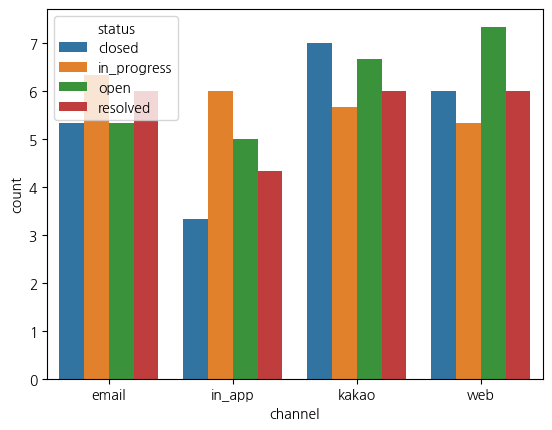

In [13]:
sns.barplot(data=df_flat, x='channel', y='count', hue='status', order=df_flat['channel'].unique(), ci = None)#, hue_order=df_flat['status'].unique())

In [14]:
event_logs['event_name'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


In [15]:
event_logs.shape

(717365, 7)

In [16]:
event_logs_how_many_user = event_logs.groupby(['event_name', 'user_id']).size().reset_index(name='count')
event_logs_how_many_user = event_logs_how_many_user.groupby(by = ['event_name']).value_counts().reset_index(name='count0')
event_logs_how_many_user = event_logs_how_many_user.drop('count', axis = 1).groupby(by = 'event_name').value_counts().reset_index(name='count')
event_logs_how_many_user[['event_name', 'count']].groupby(by = 'event_name').sum()

,count
event_name,
chat_sent,1718
checkout_started,15
course_searched,17312
course_wishlisted,3919
first_lesson_played,20275
first_quiz_submitted,17277
lesson_played,20635
onboarding_cta_clicked,268
page_viewed,20237


In [17]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [18]:
event_logs.head()
event_logs.groupby(by = 'event_name').count()

,user_id,session_id,event_timestamp,event_properties,device_type,location
event_name,,,,,,
chat_sent,1878,1878,1878,1878,1878,1878
checkout_started,15,15,15,15,15,15
course_searched,57228,57228,57228,57228,57228,57228
course_wishlisted,4792,4792,4792,4792,4792,4792
first_lesson_played,96156,96156,96156,96156,96156,96156
first_quiz_submitted,56372,56372,56372,56372,56372,56372
lesson_played,281218,281218,281218,281218,281218,281218
onboarding_cta_clicked,502,502,502,502,502,502
page_viewed,96038,96038,96038,96038,96038,96038


In [19]:
payment_transactions.head()

payment_transactions.groupby(by = 'method')['amount'].value_counts()

method  amount
apple   9.99      232
        99.99     231
        19.99     225
        199.99    222
card    99.99     280
        9.99      233
        199.99    230
        19.99     218
kakao   19.99     237
        199.99    219
        99.99     217
        9.99      211
naver   99.99     275
        19.99     230
        9.99      228
        199.99    225
paypal  9.99      263
        19.99     258
        99.99     239
        199.99    238
toss    9.99      250
        19.99     246
        199.99    232
        99.99     228
Name: count, dtype: int64

In [20]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [21]:
plan_history['reason'].value_counts()

,count
reason,
signup,19545
trial_expired,10501
trial_to_paid,5618
existing_user,3000
user_canceled,286
paid_signup,49


In [22]:
plan_history['plan_name'].value_counts()

,count
plan_name,
annual_basic,2018
monthly_basic,2001
monthly_pro,1955
annual_pro,1937


In [23]:
plan_history.isna().value_counts()

user_id  change_time  plan_name  plan_status  reason
False    False        True       False        False     31088
                      False      False        False      7911
Name: count, dtype: int64

In [24]:
push_events.groupby(by = ['push_type', 'opened'])['sent_at'].count()
#push_events

push_type  opened
promotion  False     855
           True      874
reminder   False     916
           True      887
system     False     867
           True      937
Name: sent_at, dtype: int64

In [25]:
referral_events.head()

,referrer_user_id,referred_user_id,referral_time,referral_code
0,usr_6b87a57bd775,usr_999627af31c9,2025-01-03 07:00:00,rf_2dc98f20
1,usr_065a57484a03,usr_97c482c5ea09,2024-12-04 19:23:00,rf_323a083c
2,usr_b783533a534b,usr_039406094001,2025-01-14 15:12:00,rf_9b6ed228
3,usr_999627af31c9,usr_baae86ef556b,2025-02-15 11:50:00,rf_50e5a02d
4,usr_2b0c7bbc467f,usr_2752111a2aa5,2024-12-22 02:32:00,rf_86fb7f63


## 여기에서 데이터 2개 합치기

In [26]:
plan_history_temp = plan_history.rename(columns = {'change_time': 'event_timestamp'})

s = plan_history_temp

plan_history_temp['event_properties'] = (
    '{'
    + '"now_plan":"'
    + s['plan_status'].astype(str)
    + '", "after_plan":"'
    + s['plan_name'].astype(str)
    + '"}'
)

plan_history_temp.drop(columns= ['plan_name', 'plan_status'], inplace = True)

In [27]:
df_sorted = plan_history_temp.sort_values(by='event_timestamp')
payment_transactions_temp = payment_transactions
payment_transactions_temp.rename(columns = {'event_time':'event_timestamp'}, inplace = True)
df0 = pd.merge(df_sorted, payment_transactions_temp, on = ["user_id", "event_timestamp"], how = "left").drop(columns = ["reason", "payment_id", "plan_name", "amount", "method", "status"])
df0["event_name"] = "plan_changed"

event_logs_temp = event_logs.drop(columns = ["session_id", "device_type", "location"])

df2 = pd.concat([event_logs_temp, df0], ignore_index=True)
df2

,user_id,event_name,event_timestamp,event_properties
0,usr_6b87a57bd775,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}"
1,usr_b95ee57a273a,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}"
2,usr_fc7ffc4130f7,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}"
3,usr_f0dbe9c02021,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}"
4,usr_6f08473e5134,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}"
...,...,...,...,...
756359,usr_f355aa628392,plan_changed,2025-07-21 23:49:29,"{""now_plan"":""trialing"", ""after_plan"":""nan""}"
756360,usr_d6a41334769c,plan_changed,2025-07-21 23:54:06,"{""now_plan"":""trialing"", ""after_plan"":""nan""}"
756361,usr_17ceeffe9a4d,plan_changed,2025-07-21 23:58:39,"{""now_plan"":""trialing"", ""after_plan"":""nan""}"
756362,usr_3e807028f6e7,plan_changed,2025-07-21 23:59:14,"{""now_plan"":""trialing"", ""after_plan"":""nan""}"


In [28]:
df2.sort_values(by=['event_timestamp']).reset_index(inplace = True)
#df2.drop(columns = 'index', inplace = True)

plan_history_temp = plan_history.rename(columns = {'change_time': 'event_timestamp'})
pd.to_datetime(plan_history_temp['event_timestamp'])
plan_history_temp = plan_history_temp.sort_values(by=['event_timestamp']).reset_index()
plan_history_temp['change_order'] = plan_history_temp.groupby('user_id').cumcount() + 1
plan_history_temp.sort_values(by=['change_order']).reset_index()
plan_history_temp.drop(columns = ['index'], inplace = True)
# 3. 최초 변경 기록만 추출
df_first_change = plan_history_temp[plan_history_temp['change_order'] == 1]

# 4. 2회차 이상부터 추출
df_subsequent_changes = plan_history_temp[plan_history_temp['change_order'] > 1]
df_subsequent_changes[df_subsequent_changes['plan_name'].notnull()]

df_subsequent_changes = df_subsequent_changes[df_subsequent_changes['plan_name'].notnull()]
df_subsequent_changes = df_subsequent_changes[df_subsequent_changes['plan_status'] != 'canceled']
df_subsequent_changes.loc[df_subsequent_changes['user_id'] != 'usr_4dcde0d33183'].nunique()

,0
user_id,5666
event_timestamp,112
plan_name,4
plan_status,1
reason,2
change_order,2


In [29]:
df2['status'] = None
df2.sort_values(by = 'event_timestamp', inplace = True)
df2.reset_index(inplace = True)
df2.drop(columns = ['index'], inplace = True)
df2

,user_id,event_name,event_timestamp,event_properties,status
0,usr_d0bd4612db19,plan_changed,2024-12-01 00:36:00,"{""now_plan"":""active"", ""after_plan"":""monthly_ba...",None
1,usr_d0bd4612db19,signup_completed,2024-12-01 00:36:00,"{""signup_method"": ""kakao""}",None
2,usr_81392af876f0,signup_completed,2024-12-01 02:27:00,"{""signup_method"": ""email""}",None
3,usr_81392af876f0,plan_changed,2024-12-01 02:27:00,"{""now_plan"":""active"", ""after_plan"":""annual_pro""}",None
4,usr_ecc11c7a383f,plan_changed,2024-12-01 02:35:00,"{""now_plan"":""active"", ""after_plan"":""annual_bas...",None
...,...,...,...,...,...
756359,usr_3c674df90ea6,page_viewed,2025-07-22 00:00:30,"{""page_name"": ""home""}",None
756360,usr_090201db8f9e,lesson_played,2025-07-22 00:01:00,"{""course_id"": ""L110"", ""lesson_id"": 19}",None
756361,usr_3c674df90ea6,first_quiz_submitted,2025-07-22 00:03:12,{},None
756362,usr_3c674df90ea6,lesson_played,2025-07-22 00:03:33,"{""course_id"": ""L107"", ""lesson_id"": 10}",None


In [30]:
df_first_change.dtypes

,0
user_id,object
event_timestamp,object
plan_name,object
plan_status,object
reason,object
change_order,int64


In [31]:
df_first_change['event_timestamp'] = pd.to_datetime(df_first_change['event_timestamp'])
df_first_change_temp = pd.DataFrame(df_first_change)
df_first_change_temp

/tmp/ipython-input-2404292087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_change['event_timestamp'] = pd.to_datetime(df_first_change['event_timestamp'])


,user_id,event_timestamp,plan_name,plan_status,reason,change_order
0,usr_d0bd4612db19,2024-12-01 00:36:00,monthly_basic,active,existing_user,1
1,usr_81392af876f0,2024-12-01 02:27:00,annual_pro,active,existing_user,1
2,usr_ecc11c7a383f,2024-12-01 02:35:00,annual_basic,active,existing_user,1
3,usr_dc550b6fee36,2024-12-01 03:13:00,monthly_pro,active,existing_user,1
4,usr_6c7a24bca741,2024-12-01 03:45:00,NaN,none,existing_user,1
...,...,...,...,...,...,...
38994,usr_f355aa628392,2025-07-21 23:49:29,NaN,trialing,signup,1
38995,usr_d6a41334769c,2025-07-21 23:54:06,NaN,trialing,signup,1
38996,usr_17ceeffe9a4d,2025-07-21 23:58:39,NaN,trialing,signup,1
38997,usr_3e807028f6e7,2025-07-21 23:59:14,NaN,trialing,signup,1


In [32]:
df2_temp['status']

NameError: name 'df2_temp' is not defined

In [ ]:
df2_temp = pd.DataFrame(df2)
df2_temp['event_timestamp'] = pd.to_datetime(df2_temp['event_timestamp'])
df_first_change['event_timestamp'] = pd.to_datetime(df_first_change['event_timestamp'])

df_first_change_temp = df_first_change
df_first_change_temp = df_first_change_temp.set_index('user_id')

In [ ]:

for i in df2_temp.index:
  if df2_temp.loc[i]['event_timestamp'] < df_first_change_temp.loc[df2_temp.loc[i]['user_id']]['event_timestamp']:
    df2_temp.loc['status'].map({None : df_first_change_temp.loc[df2_temp.loc[i]['user_id']]['plan_name']})
  else:
    df2_temp['status'].map({None : df_first_change_temp.loc[df2_temp.loc[i]['user_id']]['plan_status']})

In [ ]:
payment_transactions

In [ ]:
plan_history

가설 2) 학습앱 사용법이 어려워 포기하게 된다.  

방안 	2) 온보딩 튜토리얼 페이지의 유무로 A/B 테스트 하여 사람들이 비교군 사이에 결제로 가는 비율 확인

데이터 :  a/b test, event log


In [56]:
ab_user = pd.merge(ab_assignment, users, on = "user_id", how = "left")
event_logs_pay = event_logs.loc[event_logs["event_name"] == "payment_completed"]

In [57]:
df_temp = pd.merge(ab_user, event_logs_pay, on = "user_id", how = "left")
print(df_temp.groupby(by = "variant").count()["session_id"]["test"] / df_temp.groupby(by = "variant").count()["user_id"]["test"])
print(df_temp.groupby(by = "variant").count()["session_id"]["original"] / df_temp.groupby(by = "variant").count()["user_id"]["original"])

0.28502415458937197
0.285


In [68]:
plan_history_temp = plan_history.sort_values(['user_id', 'change_time'])
plan_history_temp.reset_index(drop = True, inplace = True)
plan_history_temp["plan_status"].unique()

array(['trialing', 'active', 'none', 'canceled'], dtype=object)

In [73]:
trialing_to_active = 0
total_trialing = 0
for i in range(1, len(plan_history_temp["plan_status"])):
  if plan_history_temp["plan_status"][i-1] == "trialing":
    total_trialing += 1
  if plan_history_temp["plan_status"][i] == "active":

    if plan_history_temp["plan_status"][i-1] == "trialing":
      if plan_history_temp["user_id"][i-1] == plan_history_temp["user_id"][i]:
        if plan_history_temp["user_id"][i-1] != plan_history_temp["user_id"][i-2]:
          trialing_to_active += 1
print(trialing_to_active)
print(total_trialing)

5618
20148


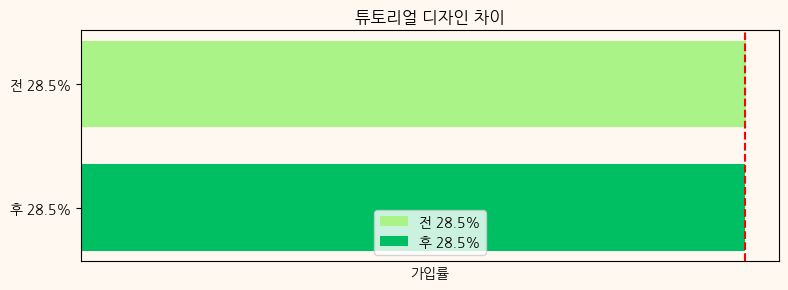

In [139]:
posibility_original = df_temp.groupby(by="variant").count()["session_id"]["original"] / df_temp.groupby(by="variant").count()["user_id"]["original"]
posibility_test = df_temp.groupby(by="variant").count()["session_id"]["test"] / df_temp.groupby(by="variant").count()["user_id"]["test"]

x = np.arange(2)
width = 0.35

plt.figure(figsize=(9, 3))
labels_temp = [f"후 {round(posibility_test*100, 2)}%",f"전 {round(posibility_original*100, 2)}%"]
color_temp = ['#00bf63', '#aaf386']

plt.barh([0, 0.5], [posibility_original, posibility_test], height=width, color=color_temp, label=labels_temp)
plt.xlabel('가입률')
plt.xticks([])

plt.title('튜토리얼 디자인 차이')

plt.yticks([0,0.5], labels_temp)
plt.gca().set_facecolor('#FFF8F0')  # 축 배경색 변경
plt.gcf().set_facecolor('#FFF8F0')  # 전체 그림 영역 배경색 변경
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower center')
plt.axvline(x=posibility_original, color='red', linestyle='--', label=posibility_original)
plt.show()


In [ ]:
df_temp = pd.merge(ab_user, payment_transactions, on = "user_id", how = "left")
#filtered_df = df_temp.loc[df_temp['event_time'] >= df_temp['assigned_at']].copy()
#filtered_df.groupby(by = "variant").count()
df_temp.groupby(by = "variant").count()
print(df_temp.groupby(by = "variant").count()["payment_id"]["test"] / df_temp.groupby(by = "variant").count()["user_id"]["test"])
print(df_temp.groupby(by = "variant").count()["payment_id"]["original"] / df_temp.groupby(by = "variant").count()["user_id"]["original"])

## 가설 3) 구독 요금제 페이지가 어렵다. (결제실패는x)   

방안 3)  구독 요금제 페이지 직관적으로 개선하기 위한 A/B 테스트 중으로 양측 중에서 어떤 구독 요금제에서 사람들의 구독률을 비교한다.

데이터 : event log, payment, a/b test  


In [126]:
event_logs_temp = event_logs.loc[event_logs['event_name'] == 'payment_completed' ].drop(columns = ['session_id', "event_properties", "location", "event_name"])
event_logs_temp

,user_id,event_timestamp,device_type
3184,usr_182a54666833,2025-04-01 18:50:18,ios
3242,usr_48262cef2493,2025-04-01 20:59:30,android
3529,usr_74ff4071a3e2,2025-04-01 17:39:00,web
3558,usr_385b38c519a3,2025-04-01 10:39:12,android
3772,usr_4dcde0d33183,2025-04-01 21:54:14,android
...,...,...,...
717069,usr_03d89ca4b544,2025-07-21 00:18:56,ios
717082,usr_b5aaa0a472e2,2025-07-21 15:22:16,web
717113,usr_1b12e00ddd1f,2025-07-21 19:48:56,ios
717140,usr_2cf9b0a3dc33,2025-07-21 16:07:42,android


In [127]:
payment_transactions_temp = payment_transactions.drop(columns = ['status', 'payment_id'])
payment_transactions_temp

,user_id,event_timestamp,plan_name,amount,method
0,usr_182a54666833,2025-04-01 00:00:00,annual_basic,99.99,apple
1,usr_48262cef2493,2025-04-01 00:00:00,monthly_basic,9.99,naver
2,usr_74ff4071a3e2,2025-04-01 00:00:00,annual_basic,99.99,naver
3,usr_385b38c519a3,2025-04-01 00:00:00,annual_basic,99.99,kakao
4,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal
...,...,...,...,...,...
5662,usr_03d89ca4b544,2025-07-21 00:00:00,monthly_basic,9.99,apple
5663,usr_b5aaa0a472e2,2025-07-21 00:00:00,annual_pro,199.99,card
5664,usr_1b12e00ddd1f,2025-07-21 00:00:00,monthly_pro,19.99,card
5665,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,99.99,kakao


In [128]:
ab_assignment_temp = ab_assignment.loc[ab_assignment['experiment_name'] == "checkout_design"].drop(columns = ["assignment_id", "experiment_id", "experiment_name"])
ab_assignment_count = ab_assignment_temp.groupby(by = "variant").count()
ab_assignment_count


,user_id,assigned_at
variant,,
control,60,60
redesign,71,71


In [129]:
ab_checkout = pd.merge(ab_assignment_temp, event_logs_temp, on = "user_id", how = "left")

In [130]:
filtered_df = ab_checkout.loc[ab_checkout['assigned_at'] <= ab_checkout['event_timestamp']].copy()
filtered_df_count = filtered_df.groupby("variant").count()

In [93]:
event_logs['event_name'].unique()

array(['signup_completed', 'lesson_played', 'course_searched',
       'chat_sent', 'page_viewed', 'quiz_submitted',
       'first_quiz_submitted', 'first_lesson_played', 'course_wishlisted',
       'push_sent', 'payment_completed', 'pricing_page_viewed',
       'subscription_canceled', 'onboarding_cta_clicked',
       'checkout_started'], dtype=object)

In [89]:
users

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,usr_7c2e7de25487,2025-07-21 09:33:26,2025-07-21 09:33:26,caeweoni@example.org,facebook_ads,none,trialing,web,NaN,NaN,F,60s,103,cmp_001,facebook,spring24
22541,usr_53fc5b5c27e3,2025-07-21 14:48:07,2025-07-21 14:48:07,yumyeongja@example.net,referral,none,trialing,ios,NaN,NaN,M,40s,45,cmp_001,facebook,spring24
22542,usr_2a0e09d7a5d0,2025-07-21 15:12:12,2025-07-21 15:12:12,yeongjinsin@example.org,direct,none,trialing,android,NaN,NaN,F,50s,57,cmp_002,referral,ref_buddy
22543,usr_66d96508fcfc,2025-07-21 00:16:38,2025-07-21 00:16:38,anyeongsu@example.com,organic,none,trialing,web,NaN,NaN,M,40s,43,cmp_003,google,sem24


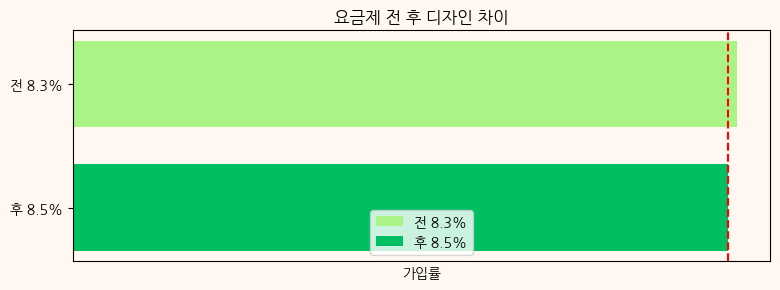

In [138]:
posibility_control = filtered_df_count["user_id"]["control"] / ab_assignment_count["user_id"]["control"]
posibility_redesign = filtered_df_count["user_id"]["redesign"] / ab_assignment_count["user_id"]["redesign"]

x = np.arange(2)
height = 0.35

plt.figure(figsize=(9, 3))
labels_temp = [f"후 {round(posibility_redesign, 3)*100}%", f"전 {round(posibility_control, 3)*100}%"]
color_temp = ['#00bf63', '#aaf386']

plt.barh([0,0.5], [posibility_control, posibility_redesign], height=height, color=color_temp, label=labels_temp)
plt.xlabel('가입률')
plt.xticks([])                        # x축 눈금(숫자) 숨김
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower center')
plt.title('요금제 전 후 디자인 차이')
plt.axvline(x=posibility_control, color='red', linestyle='--', label=posibility_control)   # 기준선: 수평선
plt.yticks([0,0.5], labels_temp)            # y축에 비교 대상 라벨 표시
plt.gca().set_facecolor('#FFF8F0')  # 축 배경색 변경
plt.gcf().set_facecolor('#FFF8F0')  # 전체 그림 영역 배경색 변경
plt.show()


#Price 행사에 따른 결과

In [ ]:
ab_assignment['experiment_name'].unique()

In [ ]:
ab_assignment_temp = ab_assignment.loc[ab_assignment['experiment_name'] == "pricing_ab"].drop(columns = ["assignment_id", "experiment_id", "experiment_name"])
ab_assignment_count = ab_assignment_temp.groupby(by = "variant").count()
ab_assignment_count

In [ ]:
event_logs_temp = event_logs.loc[event_logs['event_name'] == 'payment_completed' ].drop(columns = ['session_id', "event_properties", "location", "event_name"])
event_logs_temp

In [ ]:
ab_checkout = pd.merge(ab_assignment_temp, event_logs_temp, on = "user_id", how = "left")
ab_checkout.loc[ab_checkout['variant'] == 'A']

In [ ]:
filtered_df = ab_checkout.loc[ab_checkout['assigned_at'] <= ab_checkout['event_timestamp']].copy()
filtered_df_count = filtered_df.groupby("variant").count()

In [ ]:
filtered_df_count

In [ ]:

print( filtered_df_count["user_id"]["A"] , ab_assignment_count["user_id"]["A"])
print( filtered_df_count["user_id"]["A"] / ab_assignment_count["user_id"]["A"])

print( filtered_df_count["user_id"]["B"] , ab_assignment_count["user_id"]["B"])
print( filtered_df_count["user_id"]["B"] / ab_assignment_count["user_id"]["B"])

In [ ]:
posibility_control = filtered_df_count["user_id"]["A"] / ab_assignment_count["user_id"]["A"]
posibility_redesign = filtered_df_count["user_id"]["B"] / ab_assignment_count["user_id"]["B"]

x = np.arange(2)
height = 0.35

plt.figure(figsize=(9, 3))
labels_temp = [f"전 {round(posibility_control, 3)*100}%", f"후 {round(posibility_redesign*100, 1)}%"]
color_temp = ['#00bf63', '#aaf386']

plt.barh([0,0.5], [posibility_control, posibility_redesign], height=height, color=color_temp, label=labels_temp)
plt.ylabel('카테고리')
plt.xlabel('가입률')
plt.xticks([])                        # x축 눈금(숫자) 숨김
plt.legend(loc='lower center')
plt.title('요금제 전 후 디자인 차이')
plt.axvline(x=posibility_control, color='red', linestyle='--', label=posibility_control)   # 기준선: 수평선
plt.yticks([0,0.5], labels_temp)            # y축에 비교 대상 라벨 표시
plt.gca().set_facecolor('#FFF8F0')  # 축 배경색 변경
plt.gcf().set_facecolor('#FFF8F0')  # 전체 그림 영역 배경색 변경
plt.show()


## 플랜 히스토리에서 플랜스테이터스가 트라이얼에서 액티브로 넘어가는 사람의 수와 None에서 액티브로 넘어가는 사람들의 수를 알고 싶어요

In [33]:
plan_history_temp = pd.DataFrame(plan_history)
plan_history_temp

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [34]:
plan_history_temp = plan_history.sort_values(['user_id', 'change_time'])
plan_history_temp.reset_index(inplace = True)
plan_history_temp.drop(columns = ['index'], inplace= True)
plan_history_temp

,user_id,change_time,plan_name,plan_status,reason
0,usr_000b8936dfd7,2025-07-02 06:56:07,NaN,trialing,signup
1,usr_000d248833e6,2025-02-02 12:40:00,annual_pro,active,existing_user
2,usr_000e72325c7f,2025-06-27 00:06:53,NaN,trialing,signup
3,usr_000e72325c7f,2025-07-05 00:00:00,annual_pro,active,trial_to_paid
4,usr_0012b62db505,2025-01-27 08:07:00,NaN,none,existing_user
...,...,...,...,...,...
38994,usr_fffc47e6c004,2025-07-03 00:00:00,NaN,none,trial_expired
38995,usr_fffd521f9d14,2025-05-11 18:49:16,NaN,trialing,signup
38996,usr_fffd521f9d14,2025-05-22 00:00:00,NaN,none,trial_expired
38997,usr_ffff5152c6e3,2025-07-18 19:42:36,NaN,trialing,signup


In [55]:
#plan_history_temp["plan_status"][0]
trialing_to_active = 0
for i in range(len(plan_history_temp["plan_status"])):

  if plan_history_temp["plan_status"][i] == "active":

    if plan_history_temp["plan_status"][i-1] == "trialing":
      if plan_history_temp["user_id"][i-1] == plan_history_temp["user_id"][i]:
        if plan_history_temp["user_id"][i-1] != plan_history_temp["user_id"][i-2]:
          trialing_to_active += 1
print(trialing_to_active)

5618


In [54]:
none_to_active = 0
for i in range(len(plan_history_temp["plan_status"])):

  if plan_history_temp["plan_status"][i] == "active":

    if plan_history_temp["plan_status"][i-1] == "none":
      if plan_history_temp["user_id"][i-1] == plan_history_temp["user_id"][i]:
        if plan_history_temp["user_id"][i-1] != plan_history_temp["user_id"][i-2]:
          none_to_active += 1
print(none_to_active)

17


### 가설 2) 무료체험 유저가 학습앱 홈페이지의 사용법이 어려워 포기하게 된다.  
- 활용 데이터 :  a/b test, plan_history의 plan_status(trialing-> active) 전환율 낮음
- 현황 (데이터 분석자료) :  event log( payment 전환율 낮음)
- 방안 :a/b test (온보딩 테스트 진행 중이다.)


In [116]:
plan_history_temp = plan_history.sort_values(['user_id', 'change_time'])
plan_history_temp.reset_index(drop = True, inplace = True)
users.shape
plan_history_temp#['user_id'].nunique()

,user_id,change_time,plan_name,plan_status,reason
0,usr_000b8936dfd7,2025-07-02 06:56:07,NaN,trialing,signup
1,usr_000d248833e6,2025-02-02 12:40:00,annual_pro,active,existing_user
2,usr_000e72325c7f,2025-06-27 00:06:53,NaN,trialing,signup
3,usr_000e72325c7f,2025-07-05 00:00:00,annual_pro,active,trial_to_paid
4,usr_0012b62db505,2025-01-27 08:07:00,NaN,none,existing_user
...,...,...,...,...,...
38994,usr_fffc47e6c004,2025-07-03 00:00:00,NaN,none,trial_expired
38995,usr_fffd521f9d14,2025-05-11 18:49:16,NaN,trialing,signup
38996,usr_fffd521f9d14,2025-05-22 00:00:00,NaN,none,trial_expired
38997,usr_ffff5152c6e3,2025-07-18 19:42:36,NaN,trialing,signup


In [124]:
trialing_to_active = 0
total_trialing = 0
for i in range(1, len(plan_history_temp["plan_status"])):
  if plan_history_temp["plan_status"][i-1] == "trialing":
    total_trialing += 1
  if plan_history_temp["plan_status"][i] == "active":

    if plan_history_temp["plan_status"][i-1] == "trialing":
      if plan_history_temp["user_id"][i-1] == plan_history_temp["user_id"][i]:
        if plan_history_temp["user_id"][i-1] != plan_history_temp["user_id"][i-2]:
          trialing_to_active += 1
print(trialing_to_active)
print(total_trialing)

5618
20148


In [123]:
trialing_to_active = 0
total_trialing = 0
for i in range(1, len(plan_history_temp["plan_status"])):
  if plan_history_temp["plan_status"][i-1] == "trialing":
    total_trialing += 1
  if plan_history_temp["plan_status"][i] == "none":

    if plan_history_temp["plan_status"][i-1] == "trialing":
      if plan_history_temp["user_id"][i-1] == plan_history_temp["user_id"][i]:
        if plan_history_temp["user_id"][i-1] != plan_history_temp["user_id"][i-2]:
          trialing_to_active += 1
print(trialing_to_none)
print(total_trialing)

10501
20148


### 가설 3) 구독 요금제 페이지가 어렵다. (결제실패는x)   
- 활용 데이터 :  Payment, Event log(check out+pricing page view-> plan start date)  a/b test(check out_redesign)
- 현황 (데이터 분석자료) : 결제 실패률 없음 (payment 데이터필요)
- event log 내 course searched-> pricing page view 전환율
- 방안 : a/b test (구독요금제 페이지 redesign 테스트 중)


In [102]:
event_logs_temp = event_logs.drop(columns = ['session_id', 'device_type', 'event_properties', 'location'])
how_many_pricing_page_viewed = event_logs_temp.loc[event_logs_temp['event_name']=='pricing_page_viewed'].shape[0]
how_many_checkout_started = event_logs_temp.loc[event_logs_temp['event_name']=='checkout_started'].shape[0]
how_many_payment_completed = event_logs_temp.loc[event_logs_temp['event_name']=='payment_completed'].shape[0]
print(how_many_payment_completed / (how_many_checkout_started + how_many_pricing_page_viewed))
print(how_many_payment_completed, how_many_checkout_started, how_many_pricing_page_viewed)

0.5639918163218913
4962 15 8783
